In [1]:
# carregando base de dados https://www.openml.org/d/223
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
car = fetch_openml(name='monks-problems-1')
X, y = car.data, car.target
X.shape, y.shape

((556, 6), (556,))

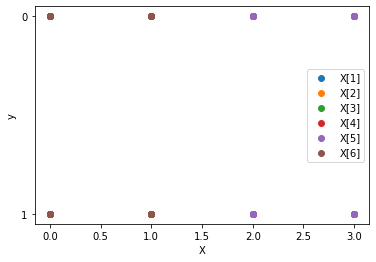

In [2]:
# exibe o gráfico da amostra
for i in range(X.shape[1]):
    plt.scatter(X[:, i], y, label=f"X[{i+1}]")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

MSE 0.3345323741007194


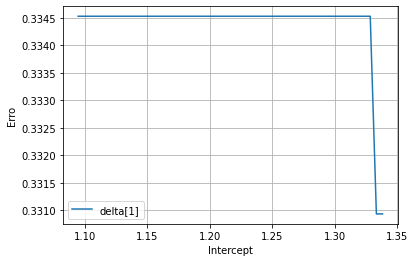

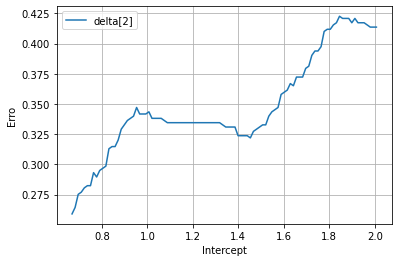

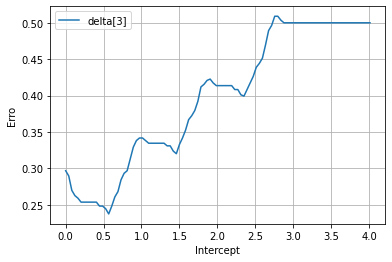

In [13]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# deltas em porcentagem
deltas_percent = [0.1, 0.5, 1]

# treina o modelo de regressão linear
model = LogisticRegression()
model.fit(X, y)

# calculando o mse para todos os exemplos
y_pred = model.predict(X)  # calcula a predição  
mse = mean_squared_error(y, y_pred) # erro medio quadratico
print(f"MSE {mse}")


# calcula os erros para cada intercept
for j in range(len(deltas_percent)):        
    errors = [] # um vetor de erro para cada delta_percent

    # eixo x
    intercept_min = model.intercept_* (1 - deltas_percent[j])
    intercept_max = model.intercept_* (1 + deltas_percent[j])
    intercept = np.linspace(intercept_min, intercept_max, 100)

    for i in range(len(intercept)): 
        model.intercept_ = intercept[i] # atualiza com o valor do intercept  
        y_pred = model.predict(X)  # calcula a predição  
        mse = mean_squared_error(y, y_pred) # erro medio quadratico
        errors.append(mse) # salva o erro daquele intercept

    # plota o gráfico do intercept x errors
    plt.ylabel("Erro")
    plt.xlabel("Intercept")
    plt.grid()
    plt.plot(intercept, errors, label=f"delta[{j+1}]")
    plt.legend()
    plt.show()
